Electrostatic potentials
========================

Suppose that we are given the electrical potential in the boundaries of
some region, and we want to find the potential $V(\mathbf{r})$ inside.
Once we know $V$ we can use the relation $\mathbf{E}=-\nabla
V(\mathbf{r})$ to determine $\mathbf{E}$. This is a “boundary problem”.
We know from classical electrodinamics (Gauss’ Law) that the potential
$V(x,y,z)$ satisfies Poisson’s equation:

$$\nabla ^2V(x,y,z)=-\frac{\rho(x,y,z)}{\epsilon 0}
$$ 

with
$$\nabla ^2V = \frac{\partial ^2V}{\partial x^2} +
\frac{\partial ^2V}{\partial y^2} +
\frac{\partial ^2V}{\partial z^2},$$ and $\rho$, the charge density
inside the region; the constant $\epsilon
_0$ is the electrical permittivity of the vaccum. Besides satisfying,
$V$ has also to satify the boundary conditions. Since the shape of the
region can be arbitrary, we need to use the computer to solve the
problem. In the particular situation that there are no charges inside
the region, the problem reduces to solving “Laplace’s equation”:
$$\nabla ^2V(x,y,z)=0.
$$ As we did in the previous examples of PDE’s, we
discretize the derivatives and we transform the equation to a finite
difgferences problem. From now on we worry only about the
two-dimensional case. We discretize the region in a grid with points
$(x,y)$ separated by intervals $(\Delta x, \Delta y)$. The second
derivatives are approximated by: 

$$\begin{aligned}
\frac{\partial^2 V(x,y)}{\partial x^2} &\simeq&
\frac{V(x+\Delta x,y)+V(x-\Delta x,y)-2V(x,y)}{(\Delta x)^2}, \\
\frac{\partial^2 V(x,y)}{\partial y^2} &\simeq&
\frac{V(x,y+\Delta y)+V(x,y-\Delta y)-2V(x,y)}{(\Delta y)^2}.
\end{aligned}$$

Replacing these expressions in (\[laplace\]) and choosing $\Delta x =
\Delta y = \Delta$ we obtain
$$V(x,y) \simeq \frac{1}{4}[V(x+\Delta, y)+V(x-\Delta,y)+V(x,y+\Delta)+
V(x,y-\Delta)].
$$ That is, the value of $V(x,y)$ is given by the
average of the values in the neighboring nodes in the grid.

Units
-----

Notice that the charge of the electron is $e=1.6 \times 10^{-19} C$.
From a microscopic point of view, the Coulomb is a very large unit of
charge. Hence, we expect that for many simulatioons we will have to
choose different units.

The finite differences algorithm
--------------------------------

Suppose that we are given the values of $V(x,y)$ in the boundaries of a
rectangular area. If we divide the rectangle in a grid, we can the apply
\[laplace\_diff\] to calculate the values of $V$ inside. However, we
notice right away that if we apply this equation in a point in the
middle, we get zero as a result. So the first obvious observation is
that the initial estimate for the method can not be a constant value. It
is evident now that the procedure has to be iterative. We start from the
bottom-left corner, and we sweep across the grid. As we obtain the first
estimate for $V$, we repeat the sweep until the values of $V$ do not
change considerably, and we can say that we have converged with certain
accuracy. Here we have started with the initial values $V(x,y)$ inside
the grid that in principle can be any initial guess (exept a constant,
as we have seen). The rate of convergence will be determined by the
proximity of this guess to the actual solution.

The algorithm can be decribed as follows:

1.  Divide the rgion of interest into a grid. The region must be
    enclosed by boundaries with known values of $V$.

2.  Assign to all points of the boundary the given values, and all
    interior cells an arbitrary potential (preferably a
    reasonable guess)

3.  sweep the internal cells by rows or columns and calculate the new
    values of $V$ as the average in the four neighboring points.
    
4.  Repeat the sweep using the values obtained in the previous
    iteration, until the potential does not change within certain level
    of accuracy.

### Exercise 7.1: Verification 

1.  Assume that the source of the potential is a point charge of $1\mu
    C$ at the origin. We know that the potential is going to be given
    by: $$V(x,y)=\frac{1\mu C}{\sqrt{x^2+y^2}}
    $$ Choose a reasonable value of $\Delta$ and compare
    the values of $V(x,y)$ given by (\[testV\]) in the center of one,
    and the average of $V$ in the four neighboring points (obtained also
    with Eq.(\[testV\])). Repeat for 5 different cells at different
    distances from the origin. Does the relative agreement depend on the
    distance of the cell to the origin?

2.  Repeat part 1 with smaller values of $\Delta$. Are the results in
    better agreement?

### Exercise 7.2: Numerical solution inside a rectangular region 

1.  Determine the potential $V(x,y)$ inside a square region with linear
    dimension $L=10cm$. The boundary of the square is at a fixed
    potential $V=10V$. Before the computation, guess the exact form of
    the potential and set the values in the interior within the area of
    each cell to be 1cm$^2$. Iterate until you achieve a 1% accuracy.

2.  Consider the same situation, but with $V(5,5)=4$. Describe the
    evolution of the solution with the iterations. Does the potential
    distribution evolve o the correct solution? Are the final results
    independent of your initial guess? What is the effect of a poor
    initial guess? Note that if you pick a constant values as the intial
    guess, the result does not evolve toward a solution.
    
3.  Set each side of the rectangle at a different potential
    5,10,5,10, repectively. Do a contour plot and sketch the
    equipotential surfaces. What happens if the potential is 10V on
    three sides and 0 on the fourth? Start with a reasonable guess for
    the initial values of the potential of the interior points, and
    iterate until you obtain a 1% accuracy.

4.  Repeat the previous item with a twice the number of cells, and
    compare the results.




In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot
import math

def solve(V):
    Vnew = V
    nx = V.shape[0]
    ny = V.shape[1]
    for y in range(1,ny-1):
        for x in range(1,nx-1):
#            if(x != ny/2 and y != nx/2):
                Vnew[y,x] = 0.25*(V[y,x-1]+V[y,x+1]+V[y-1,x]+V[y+1,x])
    return Vnew
            
lx = 0.01
ly = 0.01
nx = 20
ny = 20
dx = lx/nx
dy = ly/ny
V = np.zeros(shape=(ny+1,nx+1))


# Initialize arbitrary values
for y in range(1,ny):
    for x in range(1,nx):
        V[y,x] = 10*((x*dx)**2+(y*dy)**2)

# Initialize boundary conditions
for y in range(0,ny+1):
    V[y,0] = 5.
    V[y,nx] = 0.

for x in range(0,nx+1):
    V[0,x] = 0.
    V[ny,x] = 0.

#V[nx/2,ny/2] = 5.
    
for iter in range(1000):
    V = solve(V)
    
x = np.arange(0, lx+dx, dx)
y = np.arange(0, ly+dy, dy)
X, Y = np.meshgrid(x, y)


CS = pyplot.contour(X, Y, V);
#pyplot.clabel(CS, inline=1, fontsize=10);




In [2]:
pyplot.pcolormesh(X,Y,V);



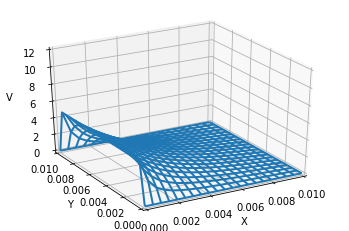

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = pyplot.figure()
ax = fig.gca(projection='3d')

ax.view_init(30, -120)

ax.set_xlim(0, 0.01)
ax.set_ylim(0, 0.01)
ax.set_zlim(0, 12)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('V')

#ax.plot_surface(X, Y, V, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=True);
ax.plot_wireframe(X, Y, V,
                       linewidth=2, antialiased=True);

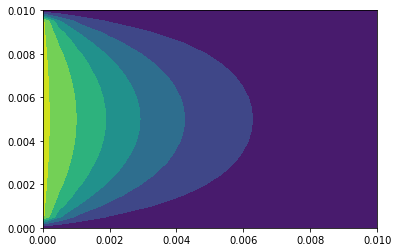

In [5]:
import matplotlib.animation as animation
from IPython.display import HTML


# Initialize arbitrary values
for y in range(1,ny):
    for x in range(1,nx):
        V[y,x] = 100*((x*dx)**2+(y*dy)**2)

# Initialize boundary conditions
for y in range(0,ny+1):
    V[y,0] = 5.
    V[y,nx] = 0.

for x in range(0,nx+1):
    V[0,x] = 0.
    V[ny,x] = 0.

#V[y/2,x/2] = 5.

fig, ax = pyplot.subplots()
ax = pyplot.axes(xlim=(0, lx), ylim=(0, ly))
cont = ax.contourf(X,Y,V)

def evolve(i):
    global V
    V = solve(V)
#    Vdata = V.ravel()
    cont = ax.contourf(X,Y,V)
#    cont.set_array(Vdata)
    return cont,

anim = animation.FuncAnimation(fig, evolve, frames = 300, interval=10, blit = False)

HTML(anim.to_jshtml())            




### Exercise 7.3: Capacitance of concentric squares 

1.  Modify your code to treat a concentric square boundary,
    <span>*i. e.*</span>, a square centered inside a bigger square. The
    potential of the outer square is 10V and the inner square is set
    at 5V. The linear dimensions of the two squares are $L_1=5$cm and
    $L_2=25$cm respectively. Choose a convenient grid. Plot the
    equipotential lines.

2.  A system of two conductors with a charge $Q$ and $-Q$ respectively
    has a capacitance $C$ which is defined by the formula:
    $$C=\frac{Q}{\Delta V},$$ where $\Delta V$ is the potential
    difference between the two conductors. The charge can be determined
    by the expression:
    $$\sigma = \frac{{\bf E \cdot n}}{\epsilon _0} = \frac{E_n}{\epsilon _0}$$
    where $\sigma$ is the surface charge density, and $E_n$ is the
    component of the electric field normal to the surface and can be
    approximated by $$E_n = \frac{-\Delta V}{\Delta r},$$ where
    $\Delta V$ is the potential difference between a boundary cell, and
    the adjacent interior at a distance $\Delta r$. Use the results of
    the previous part to calculate $\Delta V$ for each point next to the
    square surfaces. Use this information to obtain an estimate of $E_n$
    for the two surfaces, and the charge per unit of length on
    each electrode. are the two charges equal and opposite in sign?
    Calculate the capacitance in Farads.

3.  Move the inner square 1cm off center and repeat the calculations of
    parts 1. and 2. How do the equipotential surfaces change? Is there
    any qualitative difference if we set the center conductor potential
    to -5V instead of +5V?
    
#### Challenge 7.1:

Exercise 7.3, parts 1) and 3)

### Exercise 7.4: Poisson’s equation 

Laplace’s equation holds for charge free regions. If there is a charge
distribution inside the region we must use Poisson’s equation
\[poisson\] instead.

1.  Generalize the difference equation for the Poisson’s equation, and
    modify your program accordingly.

2.  Consider a square of linear dimension $L=25cm$ fixed at 10V. assume
    that each interior cell has a uniform charge density $\rho$ such
    that $\frac{1}{4}A\rho/\epsilon _0 = 3Vcm^2$, where $A$ is the area of the inner square. Compute the
    potential distribution for this case. 
    <!--Compare the equipotential
    lines with those found in Exercise 7.3.
    -->
3.  Find the potential distribution if the charge distribution of
    part 1) is restricted to a square of side $L=5cm$ in the center.


#### Challenge 7.2: 

Exercise 7.4